In [58]:
import json

import jax.numpy as jnp
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
model_type = "tensor_gru"
H_type = "cluster"
L = 64
p = 1
units = 128
numsamples = 256
dmrg = False
seed = 3
angle_list = [0.0,  0.157, 0.314, 0.471, 0.628, 0.785, 0.942, 1.1, 1.257, 1.414, 1.571]
meanE_ES = []
meanE_ES_p2 = []
meanE_ES_p4 = []
meanE_ES_dmrg = []
meanE_ES_dmrg_p2 = []
meanE_ES_dmrg_p4 = []
meanE_cluster = []
meanE_cluster_p2 = []
meanE_cluster_p4 = []
evalE_ES = []
evalE_ES_p2 = []
evalE_ES_p4 = []
evalE_ES_dmrg = []
evalE_ES_dmrg_p2 = []
evalE_ES_dmrg_p4 = []
evalvar_ES = []
evalvar_ES_p2 = []
evalvar_ES_p4 = []
evalvar_ES_dmrg = []
evalvar_ES_dmrg_p2 = []
evalvar_ES_dmrg_p4 = []
evalE_cluster = []
evalE_cluster_p2 = []
evalE_cluster_p4 = []
evalvar_cluster = []
evalvar_cluster_p2 = []
evalvar_cluster_p4 = []

for i in angle_list:
    meanE_ES.append(np.load("result/meanE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_ES_p2.append(np.load("result/meanE_1DRNN_HtypeES_L32_patch2_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_ES_p4.append(np.load("result/meanE_1DRNN_HtypeES_L16_patch4_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_ES_dmrg.append(np.load("result/meanE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_ES_dmrg_p2.append(np.load("result/meanE_1DRNN_HtypeES_L32_patch2_units64_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_ES_dmrg_p4.append(np.load("result/meanE_1DRNN_HtypeES_L16_patch4_units64_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_cluster.append(np.load("result/meanE_1DRNN_Htypecluster_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_cluster_p2.append(np.load("result/meanE_1DRNN_Htypecluster_L32_patch2_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    meanE_cluster_p4.append(np.load("result/meanE_1DRNN_Htypecluster_L16_patch4_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_ES.append(np.load("result/evalmeanE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_ES_p2.append(np.load("result/evalmeanE_1DRNN_HtypeES_L32_patch2_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_ES_p4.append(np.load("result/evalmeanE_1DRNN_HtypeES_L16_patch4_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_ES_dmrg.append(np.load("result/evalmeanE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_ES_dmrg_p2.append(np.load("result/evalmeanE_1DRNN_HtypeES_L32_patch2_units64_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_ES_dmrg_p4.append(np.load("result/evalmeanE_1DRNN_HtypeES_L16_patch4_units64_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_ES.append(np.load("result/evalvarE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_ES_p2.append(np.load("result/evalvarE_1DRNN_HtypeES_L32_patch2_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_ES_p4.append(np.load("result/evalvarE_1DRNN_HtypeES_L16_patch4_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_ES_dmrg.append(np.load("result/evalvarE_1DRNN_HtypeES_L64_patch1_units128_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_ES_dmrg_p2.append(np.load("result/evalvarE_1DRNN_HtypeES_L32_patch2_units64_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_ES_dmrg_p4.append(np.load("result/evalvarE_1DRNN_HtypeES_L16_patch4_units64_batch256_dmrgTrue_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_cluster.append(np.load("result/evalmeanE_1DRNN_Htypecluster_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_cluster_p2.append(np.load("result/evalmeanE_1DRNN_Htypecluster_L32_patch2_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalE_cluster_p4.append(np.load("result/evalmeanE_1DRNN_Htypecluster_L16_patch4_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_cluster.append(np.load("result/evalvarE_1DRNN_Htypecluster_L64_patch1_units128_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_cluster_p2.append(np.load("result/evalvarE_1DRNN_Htypecluster_L32_patch2_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())
    evalvar_cluster_p4.append(np.load("result/evalvarE_1DRNN_Htypecluster_L16_patch4_units64_batch256_dmrgFalse_seed3_angle"+str(i)+".npy").ravel().tolist())

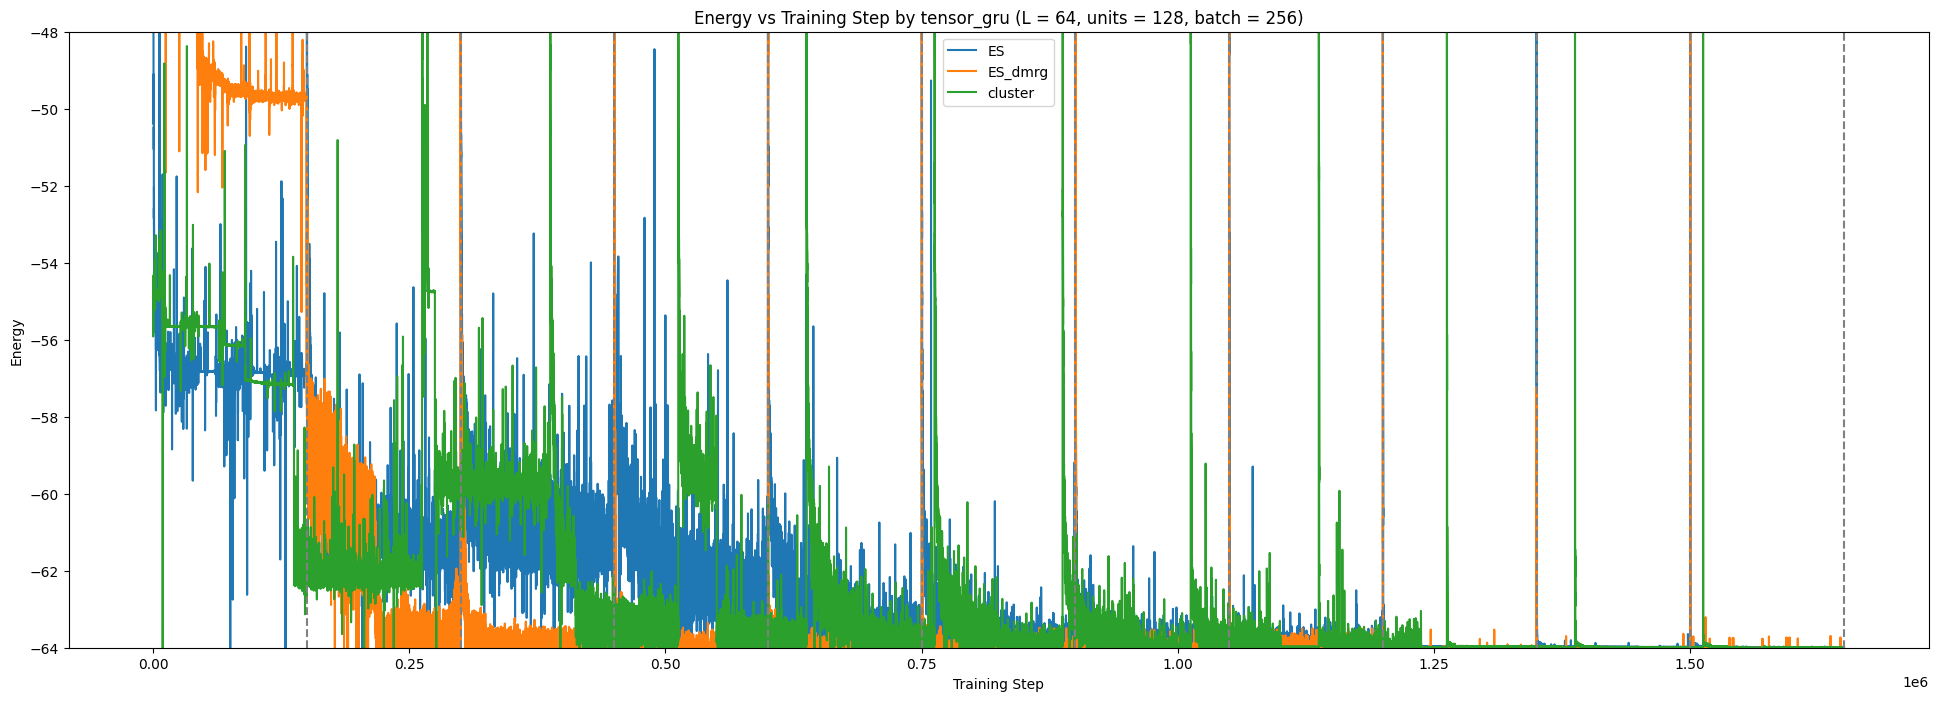

In [52]:
plt.figure(figsize=(24, 8))
plt.plot(np.arange(len(np.array(meanE_ES).ravel())), np.array(meanE_ES).ravel().real, label = "ES")
plt.plot(np.arange(len(np.array(meanE_ES_dmrg).ravel())), np.array(meanE_ES_dmrg).ravel().real, label = "ES_dmrg")
plt.plot(np.arange(len(np.array(meanE_cluster).ravel())), np.flip(np.array(meanE_cluster).reshape(12, -1), axis = 0) .ravel().real, label = "cluster")
for i in range(1, 12):
    plt.axvline(x=i*150000, color="gray", linestyle="--")
plt.ylim(-64, -48)
plt.ylabel("Energy")
plt.xlabel("Training Step")
plt.title("Energy vs Training Step by tensor_gru (L = 64, units = 128, batch = 256)")
plt.legend()
plt.show()

In [53]:
def moving_average(data, window_size = 50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

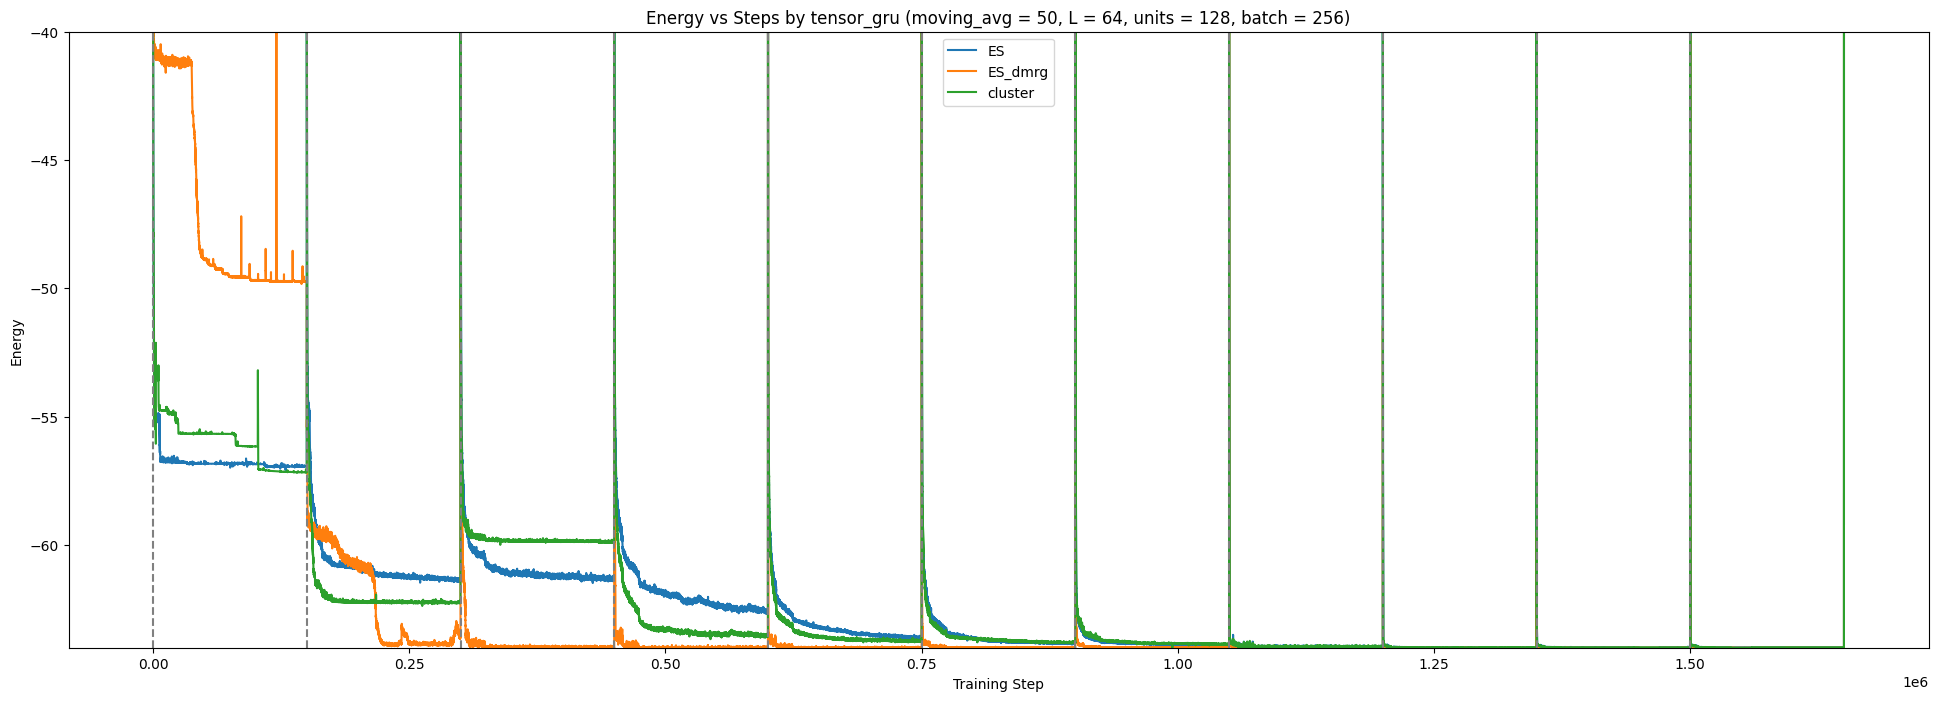

In [54]:

plt.figure(figsize=(24, 8))
plt.plot(np.arange(len(np.array(meanE_ES).ravel())), moving_average(np.array(meanE_ES).ravel().real), label = "ES")
plt.plot(np.arange(len(np.array(meanE_ES_dmrg).ravel())), moving_average(np.array(meanE_ES_dmrg).ravel().real), label = "ES_dmrg")
plt.plot(np.arange(len(np.array(meanE_cluster).ravel())), moving_average(np.flip(np.array(meanE_cluster).reshape(11, -1), axis = 0).ravel().real), label = "cluster")
for i in range(0, 11):
    plt.axvline(x=i*150000, color="gray", linestyle="--")
plt.ylim(-64, -40)
plt.ylabel("Energy")
plt.xlabel("Training Step")
plt.title("Energy vs Steps by tensor_gru (moving_avg = 50, L = 64, units = 128, batch = 256)")
plt.legend()
plt.show()

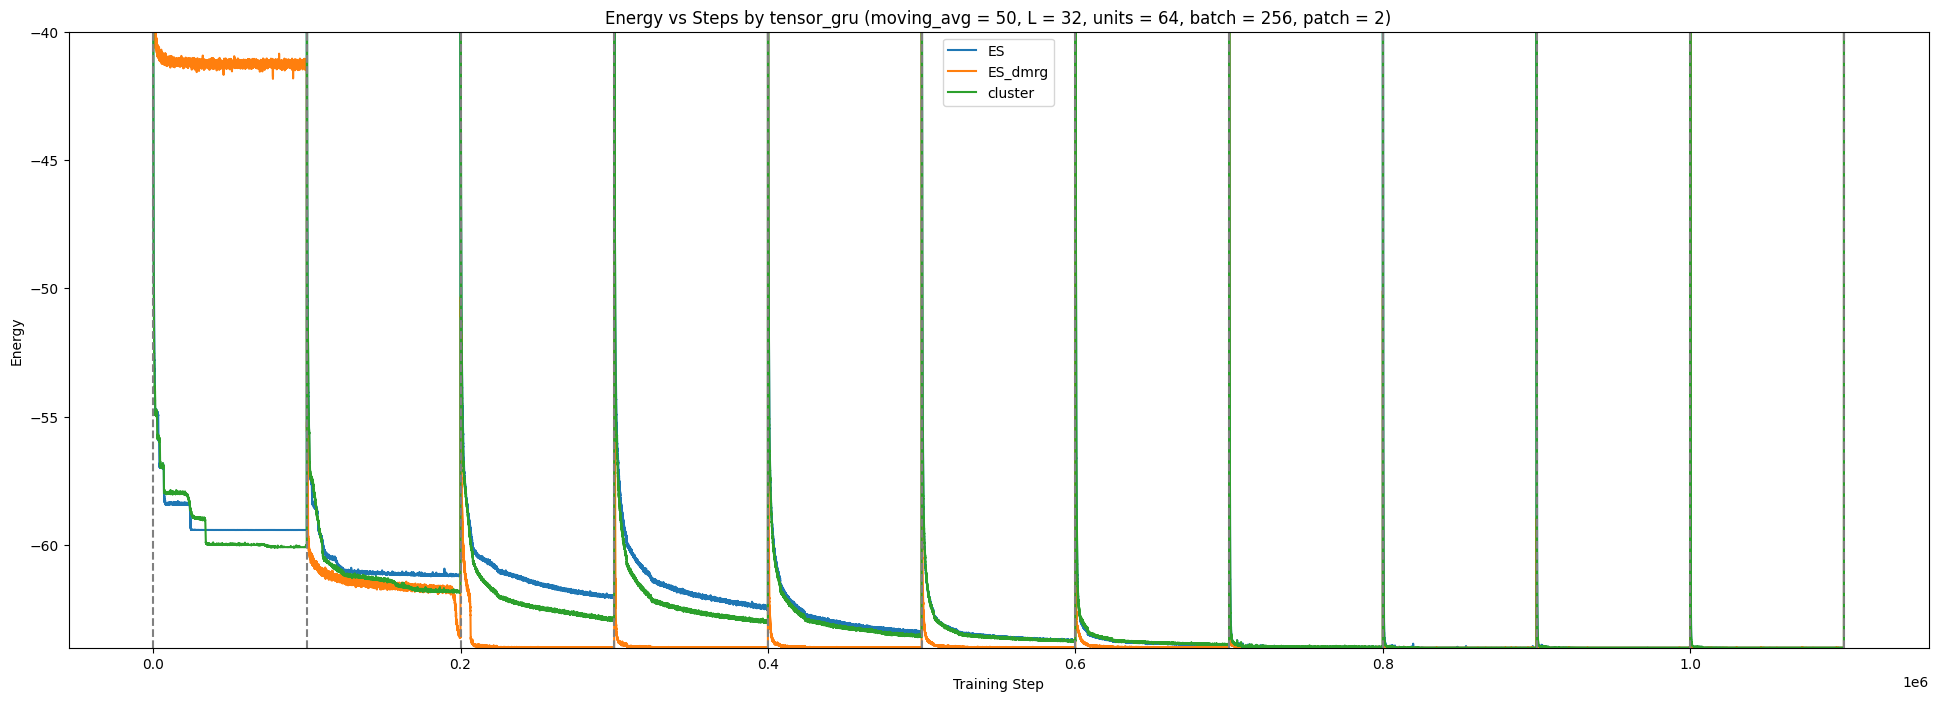

In [66]:
plt.figure(figsize=(24, 8))
plt.plot(np.arange(len(np.array(meanE_ES_p2).ravel())), moving_average(np.array(meanE_ES_p2).ravel().real), label = "ES")
plt.plot(np.arange(len(np.array(meanE_ES_dmrg_p2).ravel())), moving_average(np.array(meanE_ES_dmrg_p2).ravel().real), label = "ES_dmrg")
plt.plot(np.arange(len(np.array(meanE_cluster_p2).ravel())), moving_average(np.flip(np.array(meanE_cluster_p2).reshape(11, -1), axis = 0).ravel().real), label = "cluster")
for i in range(0, 12):
    plt.axvline(x=i*100000, color="gray", linestyle="--")
plt.ylim(-64, -40)
plt.ylabel("Energy")
plt.xlabel("Training Step")
plt.title("Energy vs Steps by tensor_gru (moving_avg = 50, L = 32, units = 64, batch = 256, patch = 2)")
plt.legend()
plt.show()

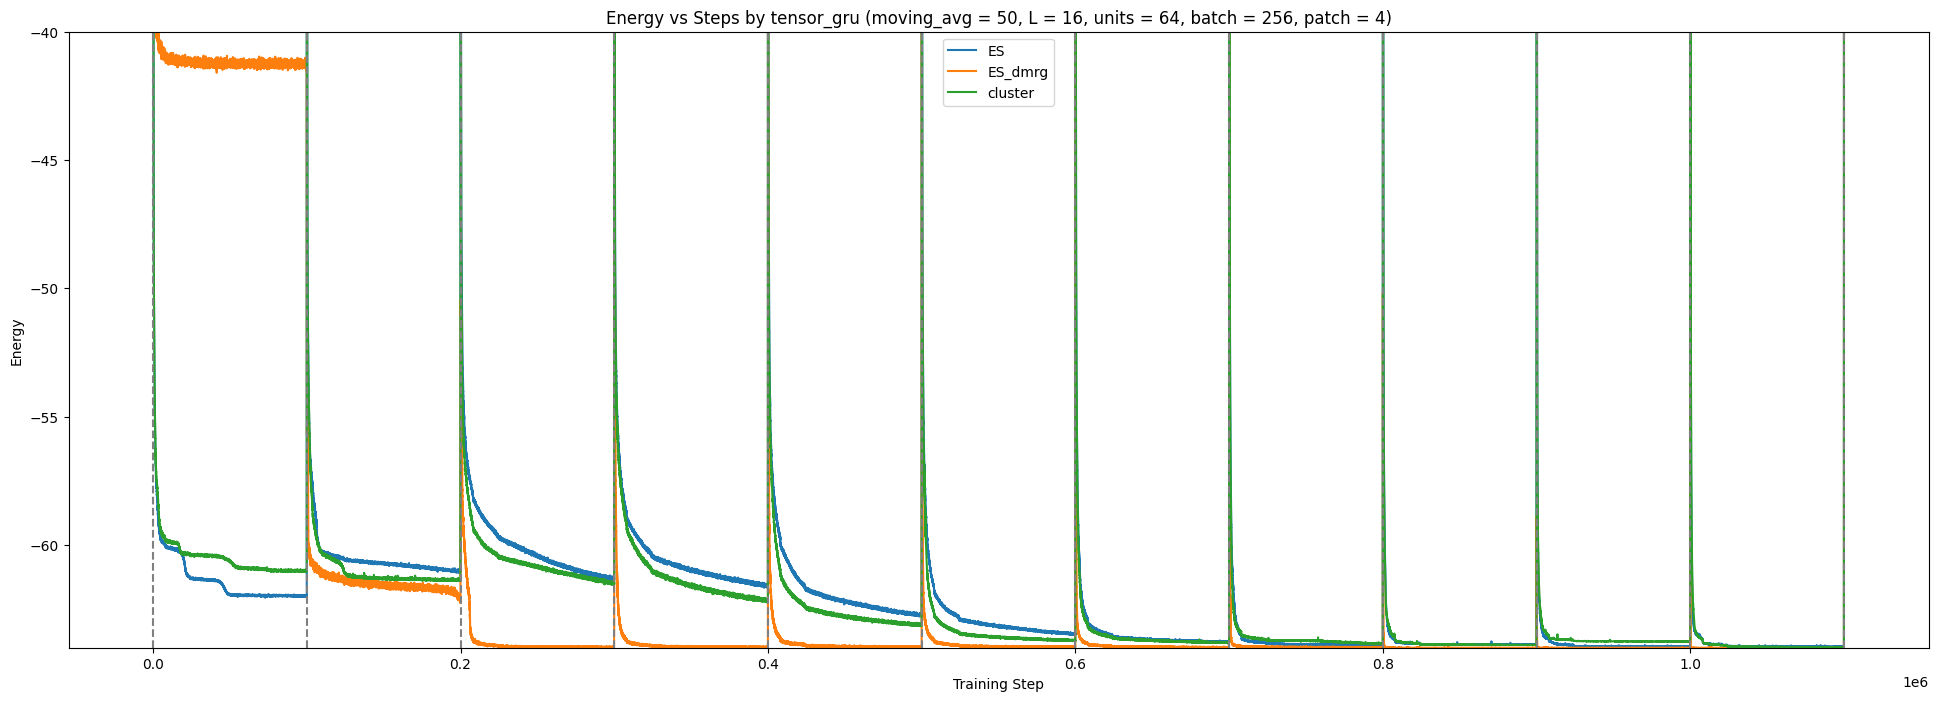

In [67]:
plt.figure(figsize=(24, 8))
plt.plot(np.arange(len(np.array(meanE_ES_p4).ravel())), moving_average(np.array(meanE_ES_p4).ravel().real), label = "ES")
plt.plot(np.arange(len(np.array(meanE_ES_dmrg_p4).ravel())), moving_average(np.array(meanE_ES_dmrg_p4).ravel().real), label = "ES_dmrg")
plt.plot(np.arange(len(np.array(meanE_cluster_p4).ravel())), moving_average(np.flip(np.array(meanE_cluster_p4).reshape(11, -1), axis = 0).ravel().real), label = "cluster")
for i in range(0, 12):
    plt.axvline(x=i*100000, color="gray", linestyle="--")
plt.ylim(-64, -40)
plt.ylabel("Energy")
plt.xlabel("Training Step")
plt.title("Energy vs Steps by tensor_gru (moving_avg = 50, L = 16, units = 64, batch = 256, patch = 4)")
plt.legend()
plt.show()

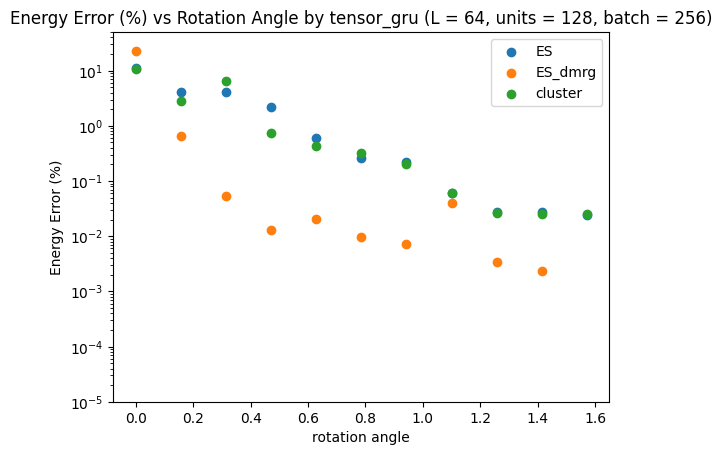

In [69]:
plt.scatter(np.array(angle_list), ((np.array(evalE_ES)+64).real/64*100).ravel(), label = "ES")
plt.scatter(np.array(angle_list), ((np.array(evalE_ES_dmrg)+64).real/64*100).ravel(), label = "ES_dmrg")
plt.scatter(np.array(angle_list), ((np.flip(np.array(evalE_cluster))+64).real/64*100).ravel(), label = "cluster")
plt.xlabel("rotation angle")
plt.ylabel("Energy Error (%)")
plt.title("Energy Error (%) vs Rotation Angle by tensor_gru (L = 64, units = 128, batch = 256)")
plt.yscale("log")
plt.ylim(1e-5, 5e1)
plt.legend()
plt.show()

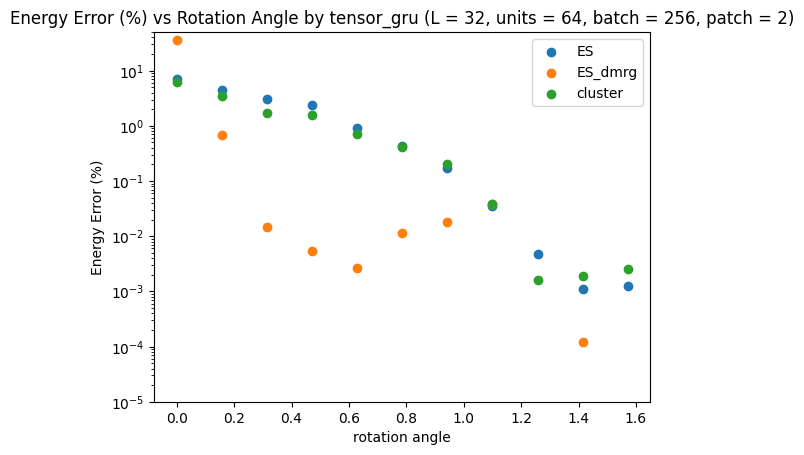

In [72]:
plt.scatter(np.array(angle_list), ((np.array(evalE_ES_p2)+64).real/64*100).ravel(), label = "ES")
plt.scatter(np.array(angle_list), ((np.array(evalE_ES_dmrg_p2)+64).real/64*100).ravel(), label = "ES_dmrg")
plt.scatter(np.array(angle_list), ((np.flip(np.array(evalE_cluster_p2))+64).real/64*100).ravel(), label = "cluster")
plt.xlabel("rotation angle")
plt.ylabel("Energy Error (%)")
plt.title("Energy Error (%) vs Rotation Angle by tensor_gru (L = 32, units = 64, batch = 256, patch = 2)")
plt.yscale("log")
plt.ylim(1e-5, 5e1)
plt.legend()
plt.show()


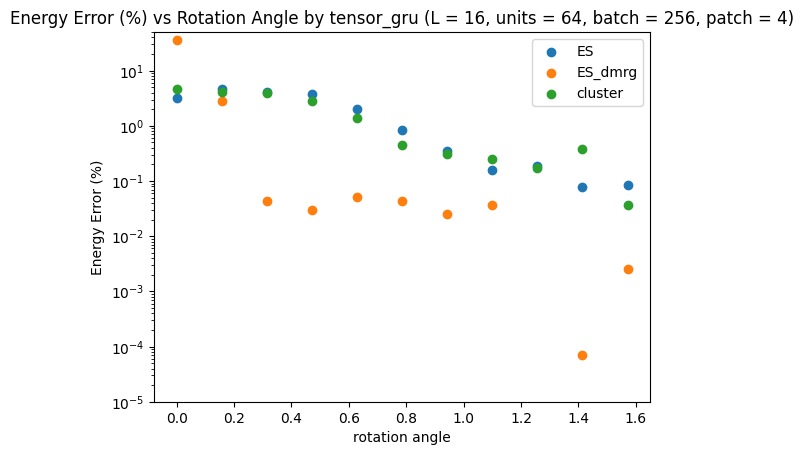

In [73]:
plt.scatter(np.array(angle_list), ((np.array(evalE_ES_p4)+64).real/64*100).ravel(), label = "ES")
plt.scatter(np.array(angle_list), ((np.array(evalE_ES_dmrg_p4)+64).real/64*100).ravel(), label = "ES_dmrg")
plt.scatter(np.array(angle_list), ((np.flip(np.array(evalE_cluster_p4))+64).real/64*100).ravel(), label = "cluster")
plt.xlabel("rotation angle")
plt.ylabel("Energy Error (%)")
plt.title("Energy Error (%) vs Rotation Angle by tensor_gru (L = 16, units = 64, batch = 256, patch = 4)")
plt.yscale("log")
plt.ylim(1e-5, 5e1)
plt.legend()
plt.show()

In [ ]:
plt.scatter(np.array(angle_list)[-5:], ((np.array(evalE_ES[-5:])+64).real/64).ravel(), label = "ES")
plt.scatter(np.array(angle_list)[-5:], ((np.array(evalE_ES_dmrg[-5:])+64).real/64).ravel(), label = "ES_dmrg")
plt.scatter(np.array(angle_list)[-5:], ((np.flip(np.array(evalE_cluster[:5]))+64).real/64).ravel(), label = "cluster")
plt.xlabel("rotation angle")
plt.ylabel("Energy Error (ratio)")
plt.yscale("log")
plt.ylim(1e-5, 3e1)
plt.title("Energy Error vs Rotation Angle by tensor_gru (L = 64, units = 128, batch = 256)")
plt.legend()
plt.show()

In [ ]:
def moving_average(data, window_size = 50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')
avg_meanE_ES = moving_average(np.array(meanE_ES).ravel().real).reshape(12, -1)
avg_meanE_ES_dmrg = moving_average(np.array(meanE_ES_dmrg).ravel().real).reshape(12, -1)
avg_meanE_cluster = moving_average(np.flip(np.array(meanE_cluster).reshape(12, -1), axis = 0).ravel().real).reshape(12, -1)
ES_converge = []
ES_dmrg_converge = []
cluster_converge = []
tarE = -62
for i in range(avg_meanE_ES.shape[0]):
    j = 0
    while (avg_meanE_ES[i, j]>tarE):
        j+=1 
        if j == 149999:
            break
    ES_converge.append(j)
    j = 0
    while (avg_meanE_ES_dmrg[i, j]>tarE):
        j += 1
        if j == 149999:
            break
    ES_dmrg_converge.append(j)
    j = 0
    while (avg_meanE_cluster[i, j]>tarE):
        j += 1
        if j == 149999:
            break
    cluster_converge.append(j)

In [ ]:
plt.scatter(np.array(angle_list), ES_converge, alpha = 0.7, label = "ES")
plt.scatter(np.array(angle_list), ES_dmrg_converge, alpha = 0.7, label = "ES_dmrg")
plt.scatter(np.array(angle_list), cluster_converge, alpha = 0.7,label = "cluster")
plt.xlabel("rotation angle")
plt.ylabel("Convergence Steps to E = " + str(tarE))
plt.title("Convergence Steps to E = " + str(tarE) + " vs Rotation Angle by tensor_gru (L = 64, units = 128, batch = 256)")
plt.legend()
plt.yscale("log")
plt.show()

In [ ]:

plt.scatter(np.array(angle_list), ((np.array(evalE_ES_dmrg)+64).real/64*100).ravel(), label = "ES_dmrg")
plt.yscale("log")
plt.ylim(1e-4, 1e1)

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
angle_list = [0.0, 0.157, 0.314, 0.471, 0.628, 0.785, 0.942, 1.1, 1.257, 1.414, 1.571]
temp_ang = [0.0, 0.471, 0.785, 1.414, 1.571]
temp_ang_c = [0.157, 0.314, 0.628, 0.942, 1.1, 1.257]
E_cluster = []
E_c = []
E_es = []

for ang in angle_list:
    if ang in temp_ang:
        with open('result/RBM/first/RBM_default_Htypecluster_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:
            # Read the entire file
            log_data = json.load(file)
            E_cluster.append(log_data["Energy"]["Mean"]["real"])
        with open('result/RBM/second/RBM_default_Htypecluster_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:       
            log_data = json.load(file)
            E_cluster.append(log_data["Energy"]["Mean"]["real"])
        with open('result/RBM/third/RBM_default_Htypecluster_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:       
            log_data = json.load(file)
            E_cluster.append(log_data["Energy"]["Mean"]["real"])
        with open('result/RBM/fourth/RBM_default_Htypecluster_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:   
            log_data = json.load(file)
            E_cluster.append(log_data["Energy"]["Mean"]["real"])
        with open('result/RBM/fifth/RBM_default_Htypecluster_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:   
            log_data = json.load(file)
            E_cluster.append(log_data["Energy"]["Mean"]["real"])
    else:
        with open('result/RBM/first/RBM_default_Htypecluster_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:
            # Read the entire file
            log_data = json.load(file)
            E_cluster.append(log_data["Energy"]["Mean"]["real"])
            if ang!= 0.628 and ang !=1.257 :
                with open('result/RBM/second/RBM_default_Htypecluster_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:
                    # Read the entire file
                    log_data = json.load(file)
                    E_cluster.append(log_data["Energy"]["Mean"]["real"])
for ang in angle_list:

    with open('result/RBM/second/RBM_default_HtypeES_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:
        log_data = json.load(file)
        E_es.append(log_data["Energy"]["Mean"]["real"])
    with open('result/RBM/third/RBM_default_HtypeES_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:
        log_data = json.load(file)
        E_es.append(log_data["Energy"]["Mean"]["real"])
    with open('result/RBM/fourth/RBM_default_HtypeES_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:
        log_data = json.load(file)
        E_es.append(log_data["Energy"]["Mean"]["real"])
    with open('result/RBM/fifth/RBM_default_HtypeES_angle='+str(ang)+'_L=64_numsample=4096.log', 'r') as file:
        log_data = json.load(file)
        E_es.append(log_data["Energy"]["Mean"]["real"])

E_es = sum(E_es, [])
E_cluster = sum(E_cluster, [])

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(np.arange(np.array(E_cluster).ravel().shape[0]), np.flip(np.array(E_cluster).reshape(11, -1), 0).ravel(),  label="cluster")
plt.plot(np.arange(np.array(E_es).ravel().shape[0]), np.array(E_es).ravel(),  label="ES")
plt.ylim(-64, 0)
plt.ylabel("Energy")
plt.xlabel("Training Step")
plt.title("Energy vs Training Step by RBM (L = 64, numsample = 4096)")
for i in range(11):
    plt.axvline(x=(i+1)*10000, color="gray", linestyle="--")
plt.legend()
plt.show()

In [ ]:
eval_E_cluster = np.flip(np.array(E_cluster).reshape(11, -1), axis = 0)[:, -1].ravel()
eval_E_es = np.array(E_es).reshape(11, -1)[:, -1].ravel()
eval_E_es[5] = np.array(E_es)[59570] #Explode after 9570 steps

In [ ]:
plt.scatter(np.array(angle_list), ((eval_E_es+64).real/64*100).ravel(), label = "ES")
plt.scatter(np.array(angle_list), ((eval_E_cluster+64).real/64*100).ravel(), label = "cluster")
plt.xlabel("rotation angle")
plt.ylabel("Energy Error (%)")
plt.title("Energy Error (%) vs Rotation Angle by RBM (L = 64, numsample = 4096)")
plt.yscale("log")
plt.legend()
plt.show()
